In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import quandl
from sklearn import preprocessing
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()

## Enter desired start and end dates

In [2]:
start = dt.datetime(2017, 3, 31)
end = dt.datetime.now()
num_months = (end.year - start.year) * 12 + (end.month - start.month)
print('Number of months in range:', num_months)

Number of months in range: 37


## Enter desired tickers

In [3]:
Long_Numerator = "JPM" # Enter whatever stocks you want to view
Short_Denominator = "BAC"

# World View

### PMI

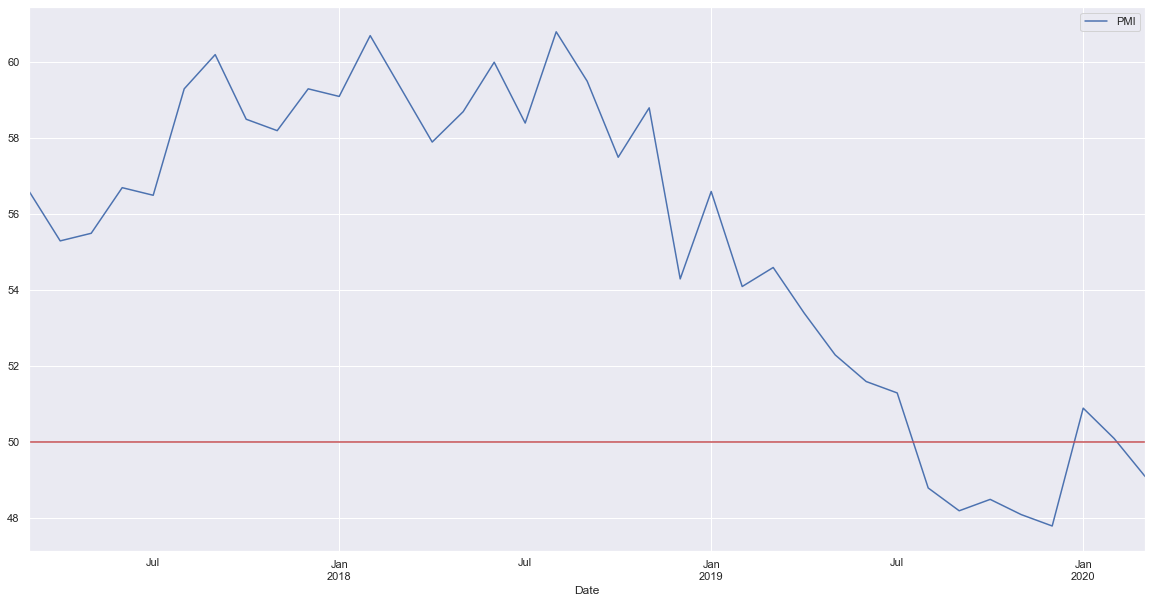

In [4]:
df_PMI = quandl.get("ISM/MAN_PMI", authtoken="InsertYourTokenHere")
df_PMI.rename(columns={'VALUE': "PMI"}, inplace=True)
df_PMI = df_PMI[-num_months:]
df_PMI.plot(figsize=(20, 10))
plt.axhline(50, color="r");

## NMI

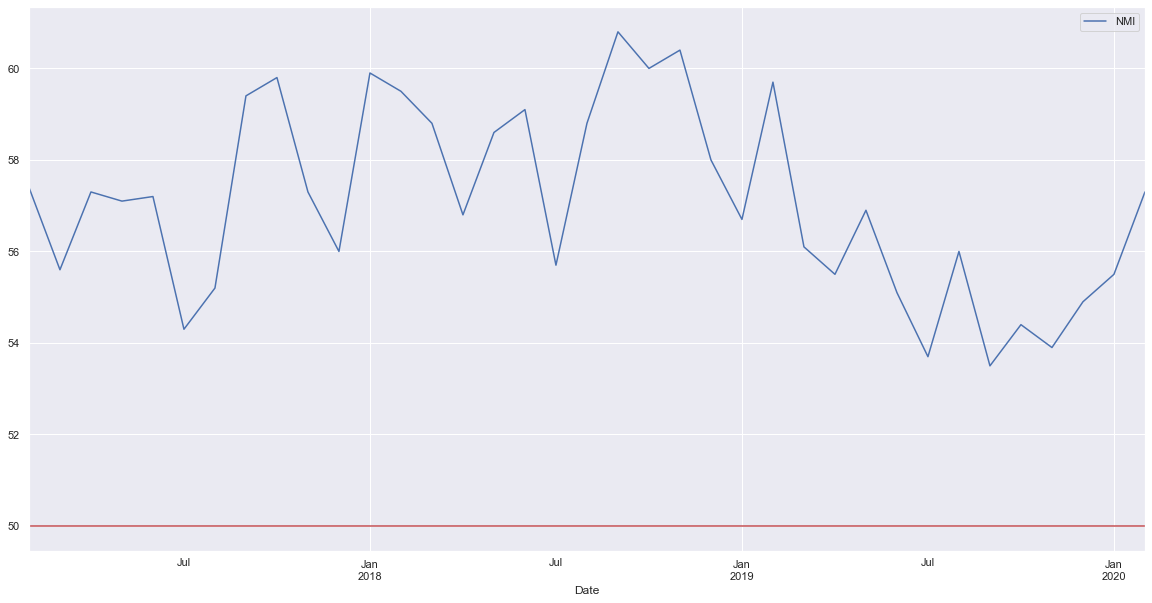

In [5]:
df_PMI = quandl.get("ISM/NONMAN_NMI", authtoken="InsertYourTokenHere")
df_PMI.rename(columns={'Index': "NMI"}, inplace=True)
df_PMI = df_PMI[-num_months:]
df_PMI.plot(figsize=(20, 10))
plt.axhline(50, color="r");

### UMCSI

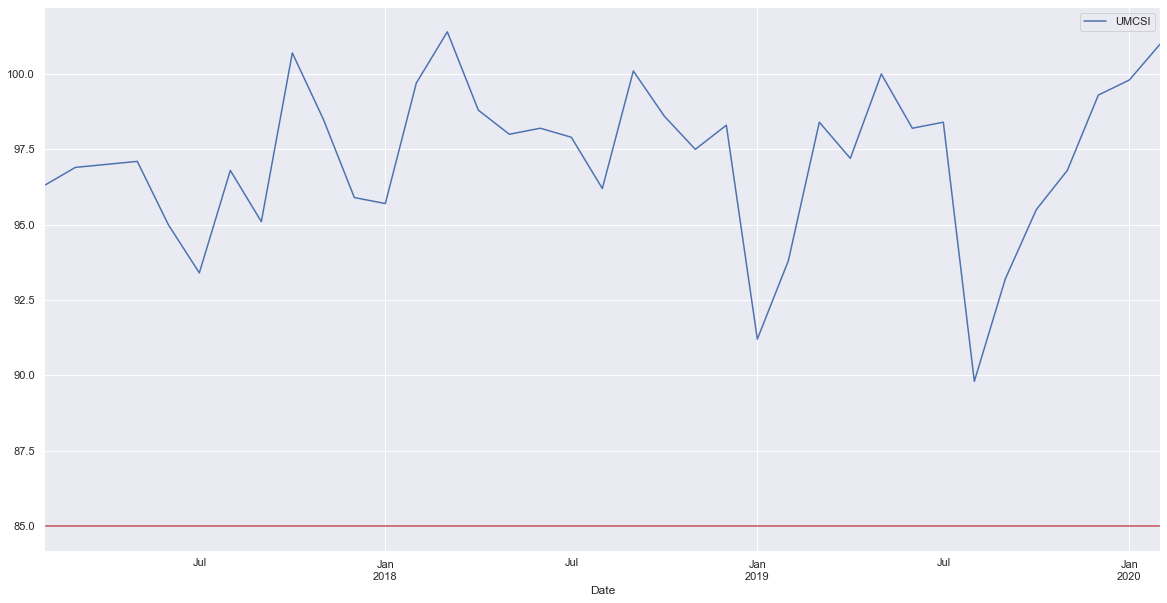

In [6]:
df_UMCSI = quandl.get("UMICH/SOC1", authtoken="InsertYourTokenHere")
df_UMCSI = df_UMCSI[::-1]
df_UMCSI.rename(columns={'Index': "UMCSI"}, inplace=True)
df_UMCSI = df_UMCSI[:num_months]
df_UMCSI.plot(figsize=(20, 10))
plt.axhline(85, color="r");

## Housing Starts

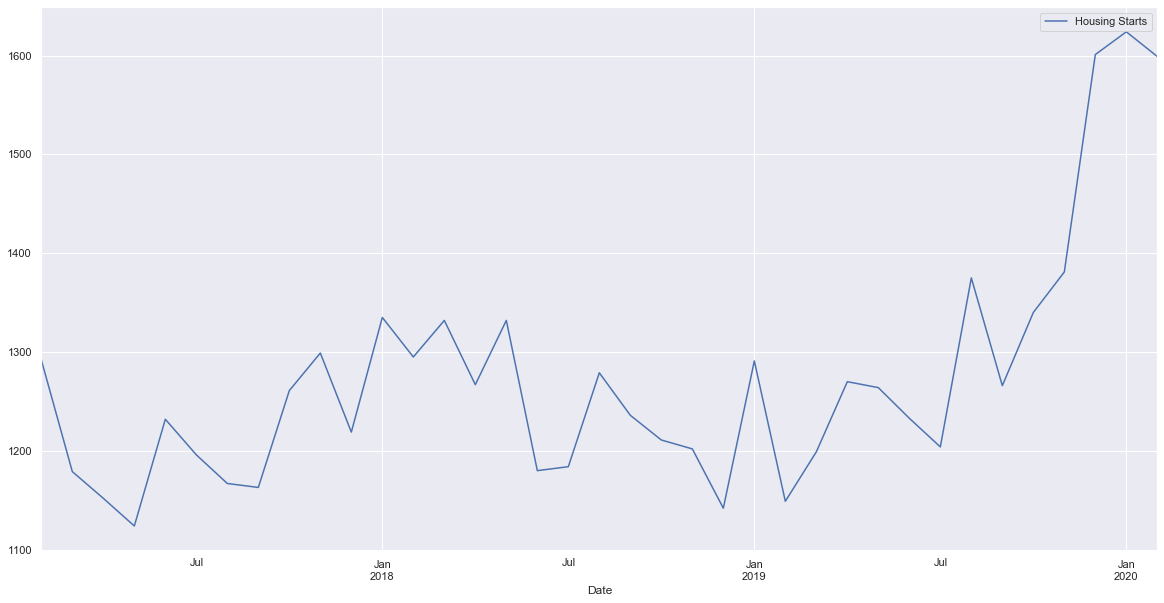

In [7]:
df_house_starts = quandl.get("FRED/HOUST", authtoken="InsertYourTokenHere")
df_house_starts = df_house_starts[::-1]
df_house_starts.rename(columns={'Value': "Housing Starts"}, inplace=True)
df_house_starts = df_house_starts[:num_months]
df_house_starts.plot(figsize=(20, 10));

## Money Supply (M2)

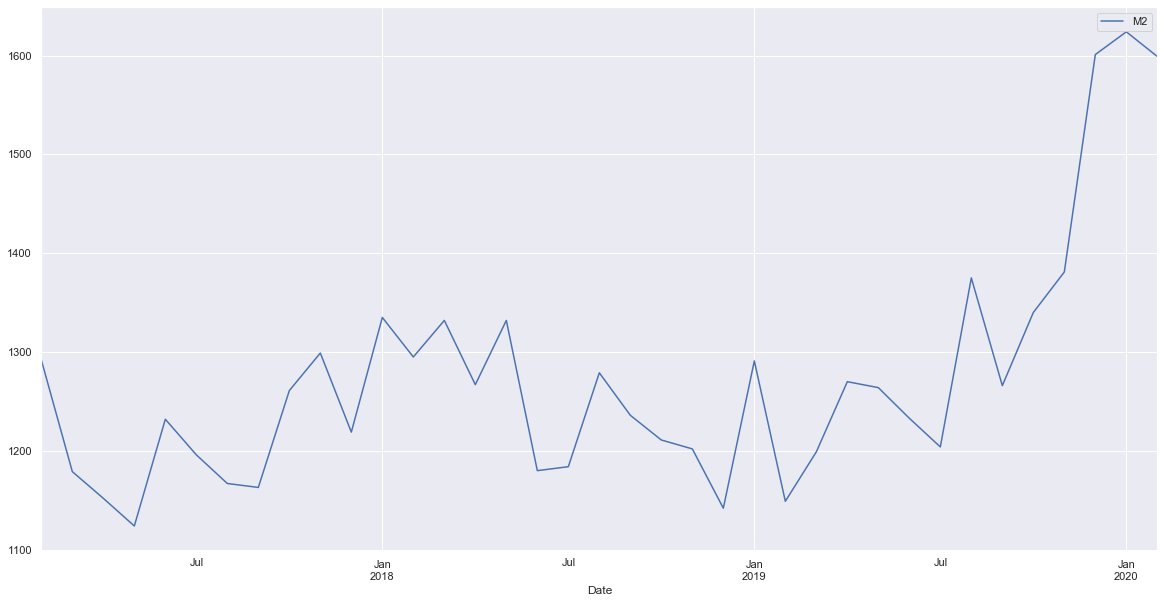

In [8]:
df_m2 = quandl.get("FRED/HOUST", authtoken="InsertYourTokenHere")
df_m2 = df_m2[::-1]
df_m2.rename(columns={'Value': "M2"}, inplace=True)
df_m2 = df_m2[:num_months]
df_m2.plot(figsize=(20, 10));

## Unemployment Rate

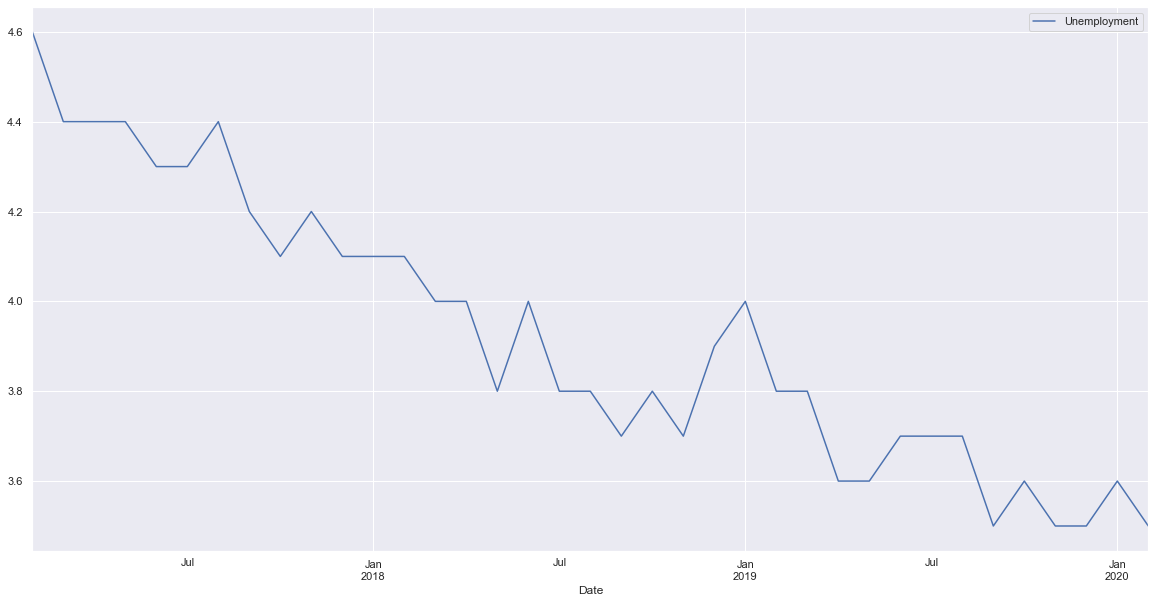

In [9]:
df_unemployment = quandl.get("FRED/UNRATE", authtoken="InsertYourTokenHere")
df_unemployment = df_unemployment[::-1]
df_unemployment.rename(columns={'Value': "Unemployment"}, inplace=True)
df_unemployment = df_unemployment[:num_months]
df_unemployment.plot(figsize=(20, 10));

## Consumer Price Index

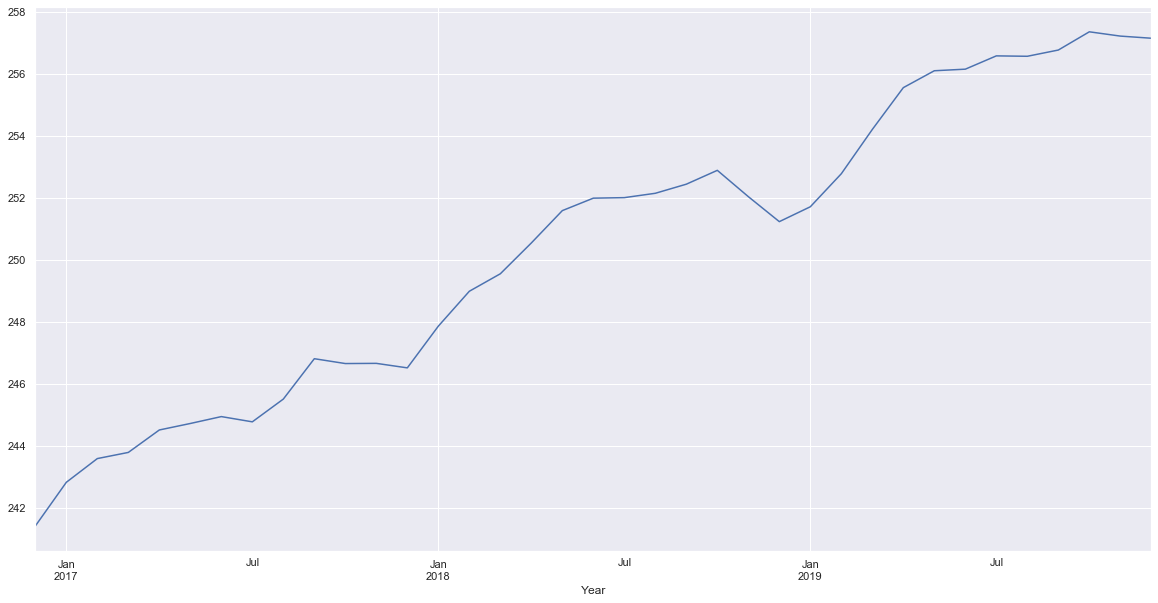

In [10]:
df_market = quandl.get("YALE/SPCOMP", authtoken="InsertYourTokenHere")
df_market = df_market[::-1]
df_market = df_market[:num_months]
df_market.drop(['S&P Composite', 'Dividend', 'Earnings', 'Long Interest Rate', 'Real Price', 'Real Dividend', 'Real Earnings'], 1, inplace=True)
df_market.rename(columns={'Cyclically Adjusted PE Ratio': "PE"}, inplace=True)
df_market['CPI'].plot(figsize=(20, 10));

## Market PE

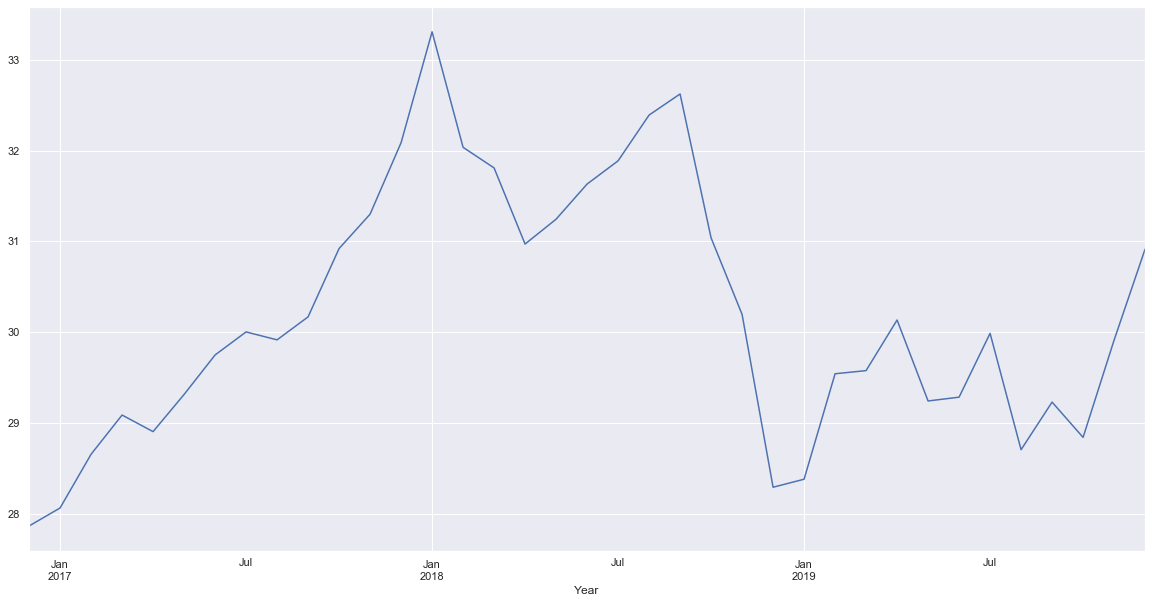

In [11]:
df_market['PE'].plot(figsize=(20, 10));

## S&P500 

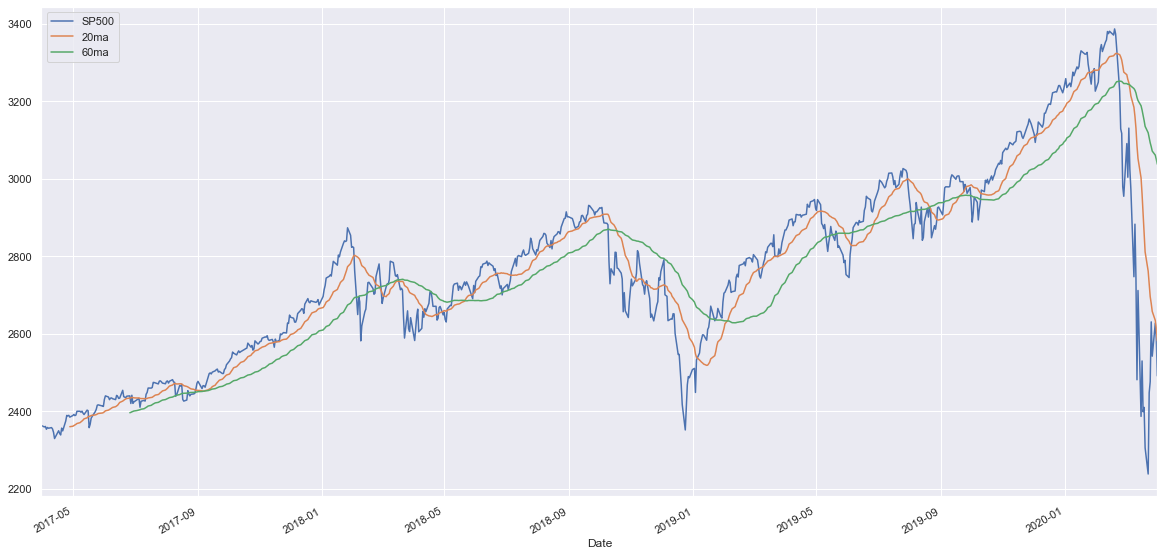

In [12]:
df_SP500 = web.DataReader("^GSPC", 'yahoo', start, end)
df_SP500.rename(columns={'Adj Close': "SP500"}, inplace=True)
df_SP500.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

df_SP500['20ma'] = df_SP500['SP500'].rolling(window=20).mean()
df_SP500['60ma'] = df_SP500['SP500'].rolling(window=60).mean()

df_SP500.plot(figsize=(20, 10));

## VIX

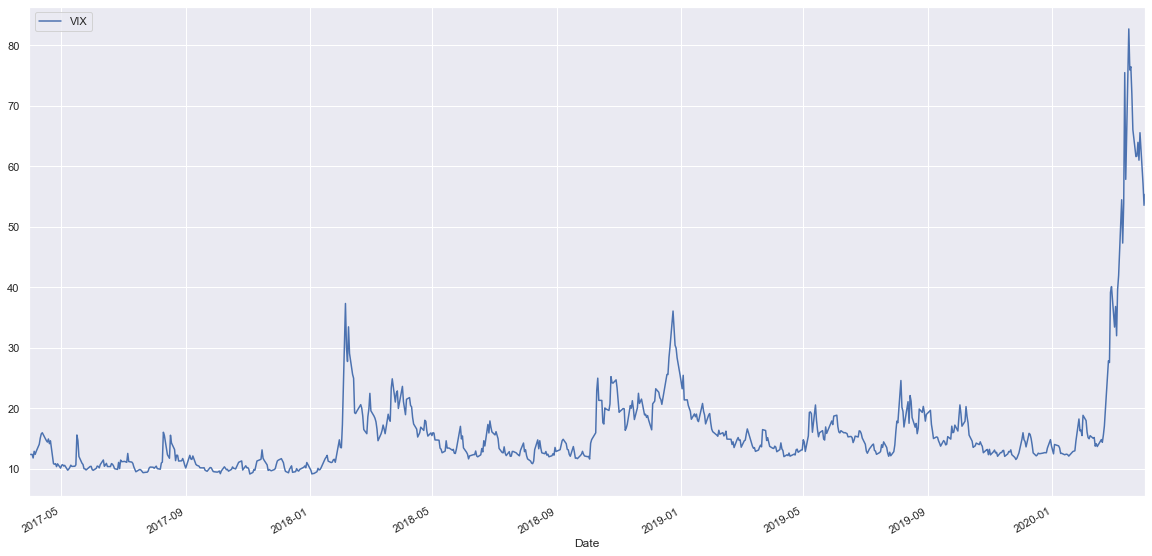

In [13]:
df_VIX = web.DataReader("^VIX", 'yahoo', start, end)
df_VIX = df_VIX[::-1]
df = web.DataReader("^VIX", 'yahoo', start, end)
df.rename(columns={'Adj Close': "VIX"}, inplace=True)
df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
df = df[::-1]
df.plot(figsize=(20, 10));

## Yield Curve (10-year minus 2-year)

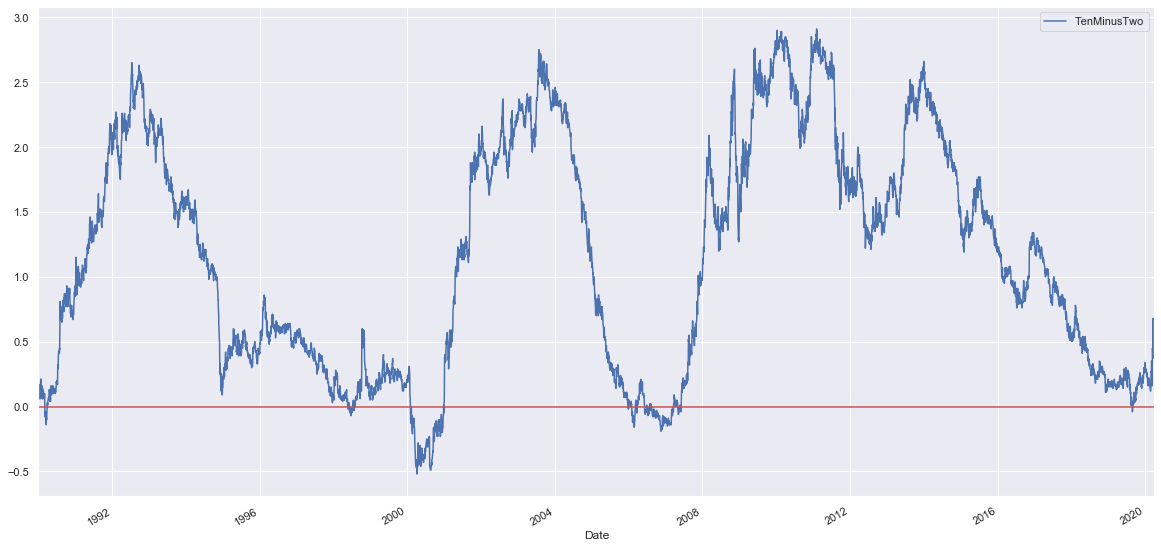

In [14]:
df_treasuryRates = quandl.get("USTREASURY/YIELD", authtoken="InsertYourTokenHere")
df_treasuryRates = df_treasuryRates[::-1]
df_treasuryRates['TenMinusTwo'] = df_treasuryRates['10 YR'] - df_treasuryRates['2 YR']
df_treasuryRates.drop(['1 MO', '2 MO', '3 MO', '6 MO', '1 YR', '2 YR', '3 YR', '5 YR', '7 YR', '10 YR', '20 YR', '30 YR'], 1, inplace=True)
df_treasuryRates.plot(figsize=(20, 10))
plt.axhline(0, color="r");

## Stock View

In [15]:
#Long Stock
df_long = web.DataReader(Long_Numerator, 'yahoo', start, end)
df_long = df_long[::-1]
df_long.rename(columns={'Adj Close': Long_Numerator}, inplace=True)
df_long.drop(['Close', 'Volume'], 1, inplace=True)
df_long['True_Range'] = df_long['High'] - df_long['Low']

#Short Stock
df_short = web.DataReader(Short_Denominator, 'yahoo', start, end)
df_short = df_short[::-1]
df_short.rename(columns={'Adj Close': Short_Denominator}, inplace=True)
df_short.drop(['Close', 'Volume'], 1, inplace=True)
df_short['True_Range'] = df_short['High'] - df_short['Low']

### Average True Range

In [16]:
df_long['1d'] = df_long['True_Range']
for i in range(df_long.shape[0] - 1):
    df_long['1d'][i] = (((df_long['True_Range'][i] + df_long['True_Range'][i+1]) / 2) / df_long['Open'][i+1])

df_short['1d'] = df_short['True_Range']
for i in range(df_long.shape[0] - 1):
    df_short['1d'][i] = (((df_short['True_Range'][i] + df_short['True_Range'][i+1]) / 2) / df_short['Open'][i+1])
    
df_long.head(10)

,High,Low,Open,JPM,True_Range,1d
Date,,,,,,
2020-04-01,86.550003,84.330002,85.099998,85.309998,2.220001,0.038294
2020-03-31,94.169998,89.339996,92.050003,90.029999,4.830002,0.053061
2020-03-30,94.089996,89.300003,90.650002,93.500000,4.789993,0.048718
2020-03-27,94.839996,90.550003,93.190002,91.129997,4.289993,0.049532
2020-03-26,98.570000,93.540001,94.080002,98.120003,5.029999,0.087629
2020-03-25,95.150002,84.540001,89.239998,91.730003,10.610001,0.104888
2020-03-24,90.099998,82.900002,84.900002,88.430000,7.199997,0.077770
2020-03-23,83.750000,78.089996,82.680000,79.029999,5.660004,0.073233
2020-03-20,89.459999,82.480003,86.300003,83.500000,6.979996,0.111452


In [17]:
ATR_5d = 0
ATR_20d = 0
ATR_60d = 0
ATR_250d = 0
ATR_750d = 0

for i in range(0,5): ATR_5d = ATR_5d + df_long['1d'][i]
for i in range(0,20): ATR_20d = ATR_20d + df_long['1d'][i]
for i in range(0,60): ATR_60d = ATR_60d + df_long['1d'][i]
for i in range(0,250): ATR_250d = ATR_250d + df_long['1d'][i]
for i in range(0,750): ATR_750d = ATR_750d + df_long['1d'][i]
    
print(Long_Numerator, " Average True Range")
print("5d ATR:\t\t", ATR_5d/5)
print("20d ATR:\t", ATR_20d/20)
print("60d ATR:\t", ATR_60d/60)
print("250d ATR:\t", ATR_250d/250)
print("750d ATR:\t", ATR_750d/750, '\n')

ATR_5d = 0
ATR_20d = 0
ATR_60d = 0
ATR_250d = 0
ATR_750d = 0

for i in range(0,5): ATR_5d = ATR_5d + df_short['1d'][i]
for i in range(0,20): ATR_20d = ATR_20d + df_short['1d'][i]
for i in range(0,60): ATR_60d = ATR_60d + df_short['1d'][i]
for i in range(0,250): ATR_250d = ATR_250d + df_short['1d'][i]
for i in range(0,750): ATR_750d = ATR_750d + df_short['1d'][i]
    
print(Short_Denominator, " Average True Range")
print("5d ATR:\t\t", ATR_5d/5)
print("20d ATR:\t", ATR_20d/20)
print("60d ATR:\t", ATR_60d/60)
print("250d ATR:\t", ATR_250d/250)
print("750d ATR:\t", ATR_750d/750)

JPM  Average True Range
5d ATR:		 0.05544687037681699
20d ATR:	 0.07879875147250322
60d ATR:	 0.03908002991600321
250d ATR:	 0.02016210116087465
750d ATR:	 0.017731751603508154 

BAC  Average True Range
5d ATR:		 0.06157691804734546
20d ATR:	 0.08418499406953171
60d ATR:	 0.0417442948379611
250d ATR:	 0.02289781476705361
750d ATR:	 0.020321261870542087


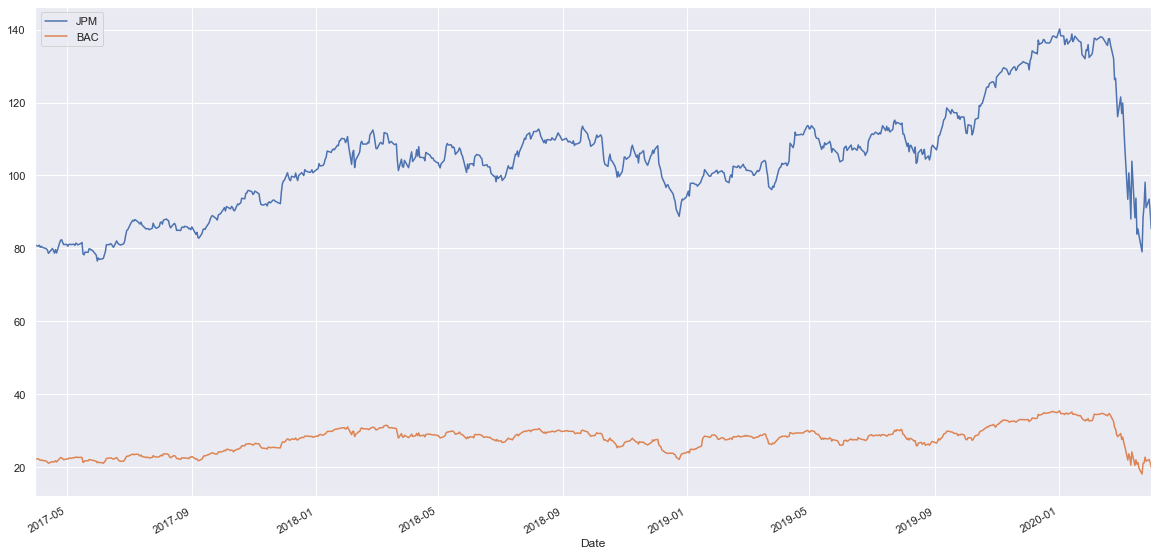

In [18]:
df_long.drop(['High', 'Low', 'Open', 'True_Range', '1d'], 1, inplace=True)
df_short.drop(['High', 'Low', 'Open', 'True_Range', '1d'], 1, inplace=True)

# Ratio and Graph
df_ratio = df_long.merge(df_short, left_on='Date', right_on='Date')

df_ratio.plot(figsize=(20, 10));

### Beta Hedge

In [19]:
df = df_ratio.merge(df_SP500, left_on='Date', right_on='Date')
df.rename(columns={'SP500': 'SPY'}, inplace=True)

stock_return = df.apply(lambda x: x / x[0])
stock_change = df.apply(lambda x: np.log(x) - np.log(x.shift(1)))
stock_change_apr = stock_change * 252 * 100    # There are 252 trading days in a year; the 100 converts to percentages

tbill = quandl.get("FRED/TB3MS", start_date=start, end_date=end)
rrf = tbill.iloc[-1, 0]    # Get the most recent Treasury Bill rate
smcorr = stock_change_apr.drop("SPY", 1).corrwith(stock_change_apr.SPY)

sy = stock_change_apr.drop("SPY", 1).std()
sx = stock_change_apr.SPY.std()

ybar = stock_change_apr.drop("SPY", 1).mean() - rrf
xbar = stock_change_apr.SPY.mean() - rrf

beta = smcorr * sy / sx
alpha = ybar - beta * xbar

In [21]:
long_beta = beta[Long_Numerator]
short_beta = beta[Short_Denominator]
print('Long beta (',Long_Numerator,'): ',long_beta) # Note: both betas are calculated based on the dates specified at the top
print('Short beta (',Short_Denominator,'):',short_beta)

Long beta ( JPM ):  1.2113704904354246
Short beta ( BAC ): 1.3241709803605255


In [22]:
df_ratio['Ratio'] = (df_ratio[Long_Numerator] / long_beta) / (df_ratio[Short_Denominator] / short_beta)
df_ratio = df_ratio[::-1]
df_ratio.drop([Long_Numerator, Short_Denominator], 1, inplace=True)

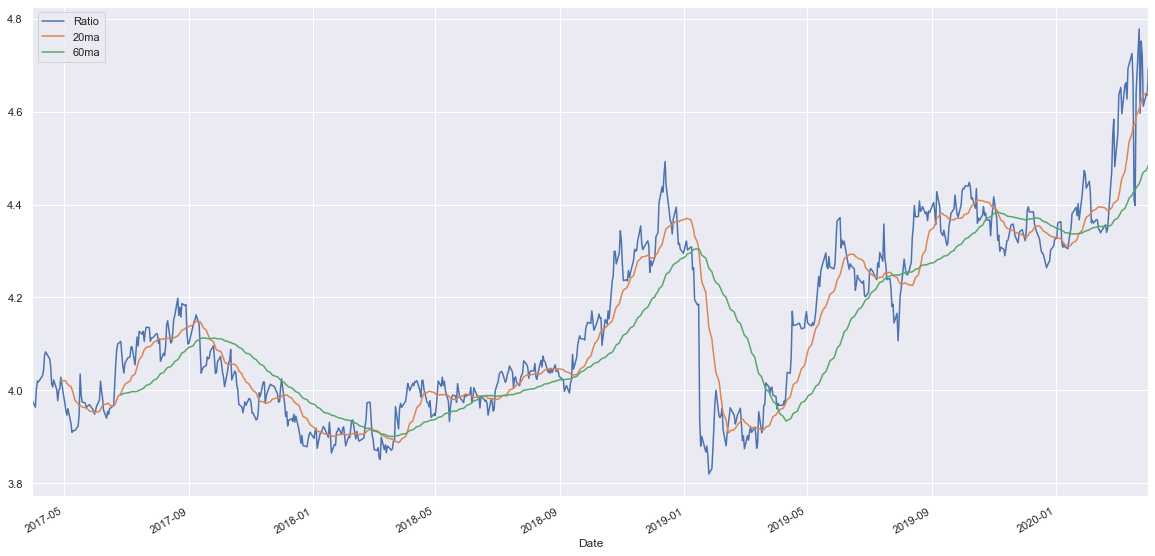

In [23]:
# This is a graph of the ratio of the two stocks with a 1 and 3 month moving averages
df_ratio['20ma'] = df_ratio['Ratio'].rolling(window=20).mean()
df_ratio['60ma'] = df_ratio['Ratio'].rolling(window=60).mean()

df_ratio.plot(figsize=(20, 10));